## Analysis of Trump Tweets


Data - Donald Trump's tweets from Jan 2015 (two years before he became president) until September 2020. These tweets are available from http://www.trumptwitterarchive.com/
<br>
<br>
Grouping these tweets by year to show how his tweet counts, frequently tweeted words, Twitter handles, and tweet sentiment has changed from year to year. 


In [1]:
# importing required packages
import pandas  as pd
import matplotlib.pyplot as plt 
import re
import nltk
#nltk.download('vader_lexicon')

import warnings
warnings.filterwarnings('ignore')

from string import punctuation
from nltk import FreqDist
from nltk.corpus import stopwords
stopwords = stopwords.words("english")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
data = pd.read_csv('trump_tweets.csv')
print(data.shape)

(33289, 7)


In [3]:
#List of columns and the Datatypes 
data.dtypes

source             object
text               object
created_at         object
retweet_count       int64
favorite_count      int64
is_retweet         object
id_str            float64
dtype: object

In [4]:
# Change the datatype of the created_at to datetime column for further process
data['created_at'] = pd.to_datetime(data['created_at'])
data.dtypes

source                    object
text                      object
created_at        datetime64[ns]
retweet_count              int64
favorite_count             int64
is_retweet                object
id_str                   float64
dtype: object

In [5]:
# Drop the columns that are not needed
data.drop(columns=['source','retweet_count', 'favorite_count',
       'is_retweet', 'id_str'],inplace=True)
data.head()

,text,created_at
0,RT @TrumpWarRoom: With 1.4 million jobs added ...,2020-09-20 01:42:00
1,THANK YOU NORTH CAROLINA!https://t.co/WwzdPhDk...,2020-09-20 01:08:00
2,https://t.co/qt07oZL9pT,2020-09-20 01:08:00
3,https://t.co/iKg0Px3PtG,2020-09-20 01:08:00
4,https://t.co/PHafD5aIEW,2020-09-20 01:07:00


### Grouping tweets by year 

Get data for each year from 2015 - 2020

In [6]:
# Create new column year from the column created_at
data['year'] = pd.DatetimeIndex(data['created_at']).year
data_years = data.groupby('year')
data15 = data_years.get_group(2015)
data16 = data_years.get_group(2016)
data17 = data_years.get_group(2017)
data18 = data_years.get_group(2018)
data19 = data_years.get_group(2019)
data20 = data_years.get_group(2020)

### Tweet Counts for each year

2020    8758
2019    7818
2015    6703
2016    3920
2018    3491
2017    2599
Name: year, dtype: int64


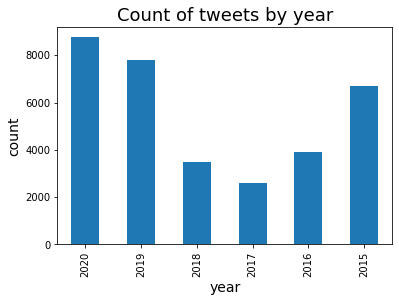

In [7]:
print(data.year.value_counts())
data.year.value_counts().sort_index(ascending=False).plot(kind='bar')
plt.xlabel('year',fontsize=14 )
plt.ylabel('count', fontsize=14)
plt.title('Count of tweets by year', fontsize=18)
plt.show()

The year 2020 has the maximum number of tweets with the least in 2017. And the posts are gradually increased from the years 2017 to 2020.

## Preprocessing

#### Creating functions to find the frequency distribution of twitter handles , most used words in tweets and polarity

In [8]:
# get entire tweets in year
def get_tweetstring(data):
    tweets = []
    tweetstr = ''
    for i in data.index:
        tweetstr = tweetstr + ' ' + data.loc[i,'text']
        tweets.append(data.loc[i, 'text'])
    tweetstr = tweetstr.strip(punctuation).lower()
    return tweets, tweetstr

# Get the frequency distribution of handles and 
# most used handles
def get_handles_freqdist(tweetstr):
    # Remove urls
    no_url = re.sub(r'http\S+', ' ', tweetstr)
    # split string to words
    handle_words = no_url.split()
    handles = []
    for w in handle_words:
        if re.search(r'^@\w+', w):
            handles.append(w)
    handles = [re.sub(r'[!:?\.]+', '', h) for h in handles]
    handlesFD = FreqDist(handles)
    return handlesFD

# Get the frequency distribution of words and
# most used words
def get_words_freqdist(tweetstr):
    # Remove urls
    no_url = re.sub(r'http\S+', ' ', tweetstr)
    # removing handles and hashtags
    no_tags = re.sub(r'[!@#$]\S+','',no_url)
    # removing single character words
    res_text = re.sub(r'[^a-z\s]+', ' ', no_tags)
    res_text = re.sub(r'\s\w\s', ' ', res_text)
    res_text = re.sub(r'[^\w\s]', '', res_text)
    # Get list of words
    word_list = res_text.split()
    # Remove words with less than 2 characters
    word_list = [w for w in word_list if len(w) > 2]
    # Removing stop words
    word_list = [w for w in word_list if w not in stopwords]
    word_list = [w for w in word_list if w not in ['amp']]
    wordsFD = FreqDist(word_list)
    return wordsFD

# Sentiment Analysis for tweets every year
def get_sentiment(tweets):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = {}
    polarity = [0]*len(tweets)

    for i, tweet in enumerate(tweets):
        tweet = tweet.strip(punctuation).lower()
        tweet = re.sub(r'http\S+', ' ', tweet)
        sentiment[i] = analyzer.polarity_scores(tweet)
        polarity[i] = sentiment[i]['compound']
    return polarity

### Get frequently used words and handles for every year

In [9]:
tweets15 = []
tweetstr15 = ''
tweets15,tweetstr15 = get_tweetstring(data15)
handles15FD = get_handles_freqdist(tweetstr15)
words15FD = get_words_freqdist(tweetstr15)
top20_handles15 = pd.DataFrame(handles15FD.most_common(20), 
                               columns = ["Handles","Frequency"]).drop([0])
top20_words15 = pd.DataFrame(words15FD.most_common(20), 
                               columns = ["Words","Frequency"])

tweets16 = []
tweetstr16 = ''
tweets16,tweetstr16 = get_tweetstring(data16)
handles16FD = get_handles_freqdist(tweetstr16)
words16FD = get_words_freqdist(tweetstr16)
top20_handles16 = pd.DataFrame(handles16FD.most_common(20), 
                               columns = ["Handles","Frequency"]).drop([0])
top20_words16 = pd.DataFrame(words16FD.most_common(20), 
                               columns = ["Words","Frequency"])

tweets17 = []
tweetstr17 = ''
tweets17,tweetstr17 = get_tweetstring(data17)
handles17FD = get_handles_freqdist(tweetstr17)
words17FD = get_words_freqdist(tweetstr17)
top20_handles17 = pd.DataFrame(handles17FD.most_common(20), 
                               columns = ["Handles","Frequency"])
top20_words17 = pd.DataFrame(words17FD.most_common(20), 
                               columns = ["Words","Frequency"])

tweets18 = []
tweetstr18 = ''
tweets18,tweetstr18 = get_tweetstring(data18)
handles18FD = get_handles_freqdist(tweetstr18)
words18FD = get_words_freqdist(tweetstr18)
top20_handles18 = pd.DataFrame(handles18FD.most_common(20), 
                               columns = ["Handles","Frequency"]).drop([0])
top20_words18 = pd.DataFrame(words18FD.most_common(20), 
                               columns = ["Words","Frequency"])

tweets19 = []
tweetstr19 = ''
tweets19,tweetstr19 = get_tweetstring(data19)
handles19FD = get_handles_freqdist(tweetstr19)
words19FD = get_words_freqdist(tweetstr19)
top20_handles19 = pd.DataFrame(handles19FD.most_common(20), 
                               columns = ["Handles","Frequency"]).drop([0])
top20_words19 = pd.DataFrame(words19FD.most_common(20), 
                               columns = ["Words","Frequency"])

tweets20 = []
tweetstr20 = ''
tweets20,tweetstr20 = get_tweetstring(data20)
handles20FD = get_handles_freqdist(tweetstr20)
words20FD = get_words_freqdist(tweetstr20)
top20_handles20 = pd.DataFrame(handles20FD.most_common(20), 
                               columns = ["Handles","Frequency"]).drop([0])
top20_words20 = pd.DataFrame(words20FD.most_common(20), 
                               columns = ["Words","Frequency"])

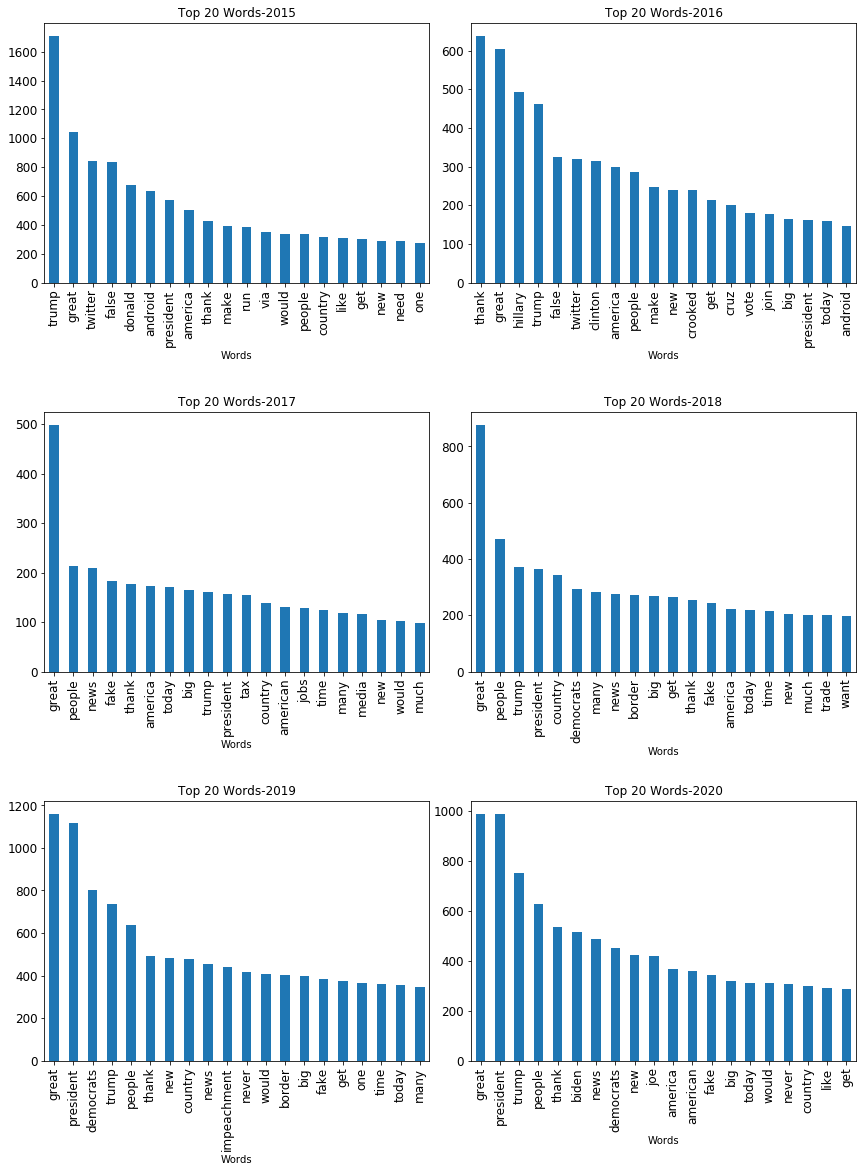

In [10]:
fig, a = plt.subplots(3, 2, figsize=(12,15),squeeze=False)
fig.tight_layout()
#fig.suptitle('Frequently used words in tweets 2015-2020',fontsize=16)
fig.subplots_adjust(hspace=.5)
top20_words15.plot(kind="bar",x="Words",y="Frequency", legend=False, 
                     title="Top 20 Words-2015", ax=a[0][0],fontsize=12)
top20_words16.plot(kind="bar",x="Words",y="Frequency", legend=False, 
                     title="Top 20 Words-2016", ax=a[0][1],fontsize=12)
top20_words17.plot(kind="bar",x="Words",y="Frequency", legend=False, 
                     title="Top 20 Words-2017", ax=a[1][0],fontsize=12)
top20_words18.plot(kind="bar",x="Words",y="Frequency", legend=False, 
                     title="Top 20 Words-2018", ax=a[1][1],fontsize=12)
top20_words19.plot(kind="bar",x="Words",y="Frequency", legend=False, 
                     title="Top 20 Words-2019", ax=a[2][0],fontsize=12)
top20_words20.plot(kind="bar",x="Words",y="Frequency", legend=False, 
                     title="Top 20 Words-2020", ax=a[2][1],fontsize=12)

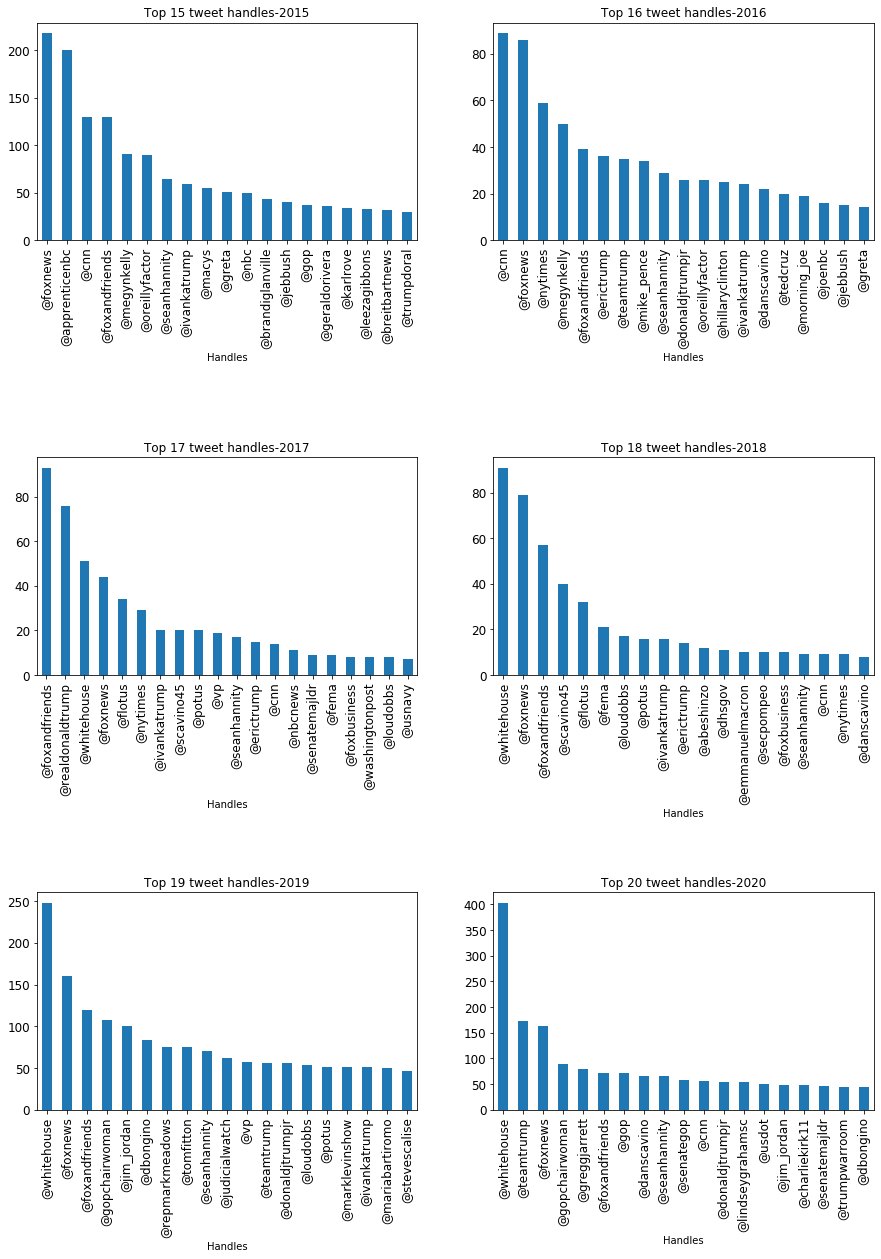

In [11]:
fig, a = plt.subplots(3, 2, figsize=(15,20),squeeze=False)
#fig.suptitle('Twitter Handles subplots 2015-2020',fontsize=16)
fig.subplots_adjust(hspace=1)
top20_handles15.plot(kind="bar",x="Handles",y="Frequency", legend=False, 
                     title="Top 15 tweet handles-2015", ax=a[0][0],fontsize=12)
top20_handles16.plot(kind="bar",x="Handles",y="Frequency", legend=False, 
                     title="Top 16 tweet handles-2016", ax=a[0][1],fontsize=12)
top20_handles17.plot(kind="bar",x="Handles",y="Frequency", legend=False, 
                     title="Top 17 tweet handles-2017", ax=a[1][0],fontsize=12)
top20_handles18.plot(kind="bar",x="Handles",y="Frequency", legend=False, 
                     title="Top 18 tweet handles-2018", ax=a[1][1],fontsize=12)
top20_handles19.plot(kind="bar",x="Handles",y="Frequency", legend=False, 
                     title="Top 19 tweet handles-2019", ax=a[2][0],fontsize=12)
top20_handles20.plot(kind="bar",x="Handles",y="Frequency", legend=False, 
                     title="Top 20 tweet handles-2020", ax=a[2][1],fontsize=12)

### Sentiment Analysis over the years

In [12]:
data15['polarity'] = get_sentiment(tweets15)
data16['polarity'] = get_sentiment(tweets16)
data17['polarity'] = get_sentiment(tweets17)
data18['polarity'] = get_sentiment(tweets18)
data19['polarity'] = get_sentiment(tweets19)
data20['polarity'] = get_sentiment(tweets20)

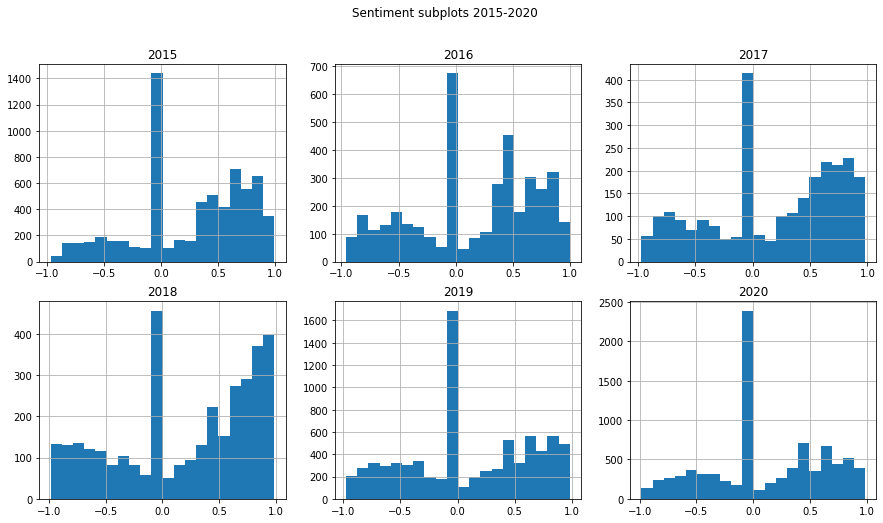

In [13]:
fig, a = plt.subplots(2, 3, figsize=(15,8))
fig.suptitle('Sentiment subplots 2015-2020')
a[0][0].title.set_text("2015")
a[0][1].title.set_text("2016")
a[0][2].title.set_text("2017")
a[1][0].title.set_text("2018")
a[1][1].title.set_text("2019")
a[1][2].title.set_text("2020")
data15['polarity'].hist(bins=20,ax=a[0][0])
data16['polarity'].hist(bins=20,ax=a[0][1])
data17['polarity'].hist(bins=20,ax=a[0][2])
data18['polarity'].hist(bins=20,ax=a[1][0])
data19['polarity'].hist(bins=20,ax=a[1][1])
data20['polarity'].hist(bins=20,ax=a[1][2])


From the above plots we see that tweet sentiment has changed over the years.

Comparing the tweets over the years, most of the tweets are of neutral sentiment followed by the positive sentiment. The negative sentiment tweets are low compared to positive tweets.